# Quantum kicked rotor

$H_1=\frac{1}{2m}p_1^2 +K_1\cos{ q_1}\sum_n \delta (t-nT)$

$U_k = exp(-\frac{i}{\hslash}K_1 \cos{q_1})exp(-\frac{iT}{2\hslash}p_1^2)$

$U_{mn} = \left<m\right| U_k \left|n\right>=\frac{1}{\sqrt{N}}exp\left( -i\frac{Nk_j}{2\pi} \cos{\left[\frac{2\pi}{N}(n+\alpha)\right]} \right)\times exp\left( i\frac{\pi}{N}(n-m)^2 \right)$

In [1]:
#importing libraries
import numpy as np
import scipy as sp
import qutip as qt
import matplotlib.pyplot as plt

In [2]:
#--------------------------------------------
# input paramater
kicks=10
N=200
Nb=N*N
k=[9]# 1st one is k1. It is in list so that we can add k2 as next element.
b=2/N
pow_N=15
ϵ=10**(-pow_N)# tollerance. If value is bellow ϵ then it will taken as zero.
#--------------------------------------------

#converting to float
N=float(N)
Nb=float(Nb)
b=float(b)
k[0]=float(k[0])
#--------------------------------------------


# matrix elements are in position basis
# Flouet matrix element(m,n) of each unperturbed subsystem. kj input is k[j].
def U_k_elmt(kj,m,n): 
    part1=(np.pi/N)*pow(n-m,2)
    part2=(2*np.pi/N)*(n)
    part3=(kj*N/(2*np.pi))*np.cos(part2)
    uk_mn=(1/np.sqrt(N))*np.exp(-1j*part3)*np.exp(1j*part1)
    return uk_mn
#--------------------------------------------

In [3]:
# Floquet matrices

U_k1=sp.sparse.lil_matrix((int(N),int(N)),dtype=np.complex_)

# U_k1
for row in range(int(N)):
    for column in range(int(N)):
        U_k1_mn=U_k_elmt(k[0],float(row),float(column))
        if np.abs(U_k1_mn.real) >= ϵ or np.abs(U_k1_mn.imag) >= ϵ:
            U_k1[(row,column)]=np.round(U_k1_mn,pow_N)
            
                        
# As csr sparce or csc are efficient sparse matrix. So we change U_k1,U_k2,U_b to csr
U_k1 = U_k1.tocsr()

In [4]:
# Floquet operator of 1st system.
qt.Qobj(U_k1.toarray())

Quantum object: dims = [[200], [200]], shape = (200, 200), type = oper, isherm = False
Qobj data =
[[-0.05859989+0.03957339j -0.06406872+0.02991988j -0.07066941-0.00241546j
  ... -0.04830186-0.05164233j -0.07066941-0.00241546j
  -0.06406872+0.02991988j]
 [-0.05921425+0.03864806j -0.06359086+0.03092253j -0.07070474+0.00091621j
  ... -0.04234323-0.05663083j -0.07026205-0.00795267j
  -0.06540702+0.02686861j]
 [-0.06096909+0.03581578j -0.06406872+0.02991988j -0.07068163+0.00202667j
  ... -0.03394144-0.06203208j -0.06896505-0.0156148j
  -0.06731347+0.02165401j]
 ...
 [-0.06359122+0.03092179j -0.06928315+0.01413664j -0.06607688-0.02517629j
  ... -0.05509645-0.04432134j -0.07070474+0.00091621j
  -0.06540702+0.02686861j]
 [-0.06096909+0.03581578j -0.06731347+0.02165401j -0.06896505-0.0156148j
  ... -0.05439349-0.04518129j -0.07068163+0.00202667j
  -0.06406872+0.02991988j]
 [-0.05921425+0.03864806j -0.06540702+0.02686861j -0.07026205-0.00795267j
  ... -0.05220477-0.04769341j -0.07070474+0.00091

## Evolution of quantum state in Schrodinger Picture

If the system is chaotic we can see the signature of chos as scrambling of hussimi distribution.

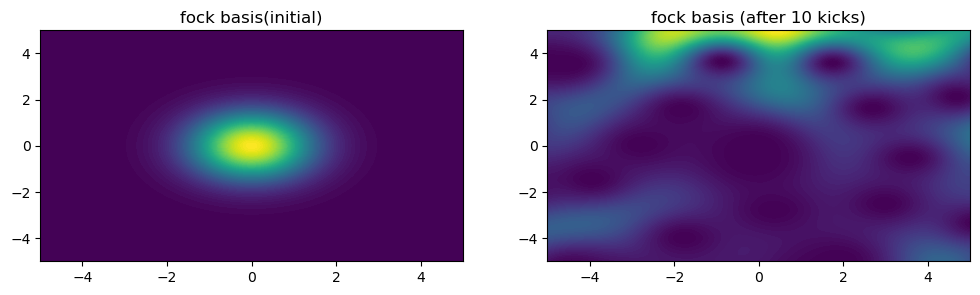

In [5]:
#--------------------------------------------
kicks=10
# Initial state.
#psi=qt.rand_ket(int(N)); ; state_name = 'Random state' #qt.rand_ket means any random initial state.
psi = qt.basis(int(N),0); state_name =  'fock basis' # fock basis
#psi = qt.coherent(int(N),1); state_name = 'coherent state' 
#--------------------------------------------

qt_U_k1 = qt.Qobj(U_k1.toarray())

# ploting the initial state
xvec = np.linspace(-5, 5, 500)
qt_Qfun = qt.qfunc(psi, xvec, xvec)

fig, axes = plt.subplots(1, 2, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, qt_Qfun, 100)
lbl0 = axes[0].set_title(f'{state_name}(initial)')

#time evolution of state
for i in range(kicks):
    psi = qt_U_k1*psi

qt_Qfun = qt.qfunc(psi, xvec, xvec)
cont1 = axes[1].contourf(xvec, xvec, qt_Qfun, 100)
lbl1 = axes[1].set_title(f'{state_name} (after {kicks} kicks)')

plt.show()

# Kikcked rotar in classical picture

Quantum kicked rotor can be represented by standard map in classical limit.

## Standard map
$\theta_{n+1} = (\theta_n +p_n) mod 2\pi$

$p_{n+1} = p_n + k \sin(\theta_{n+1})$

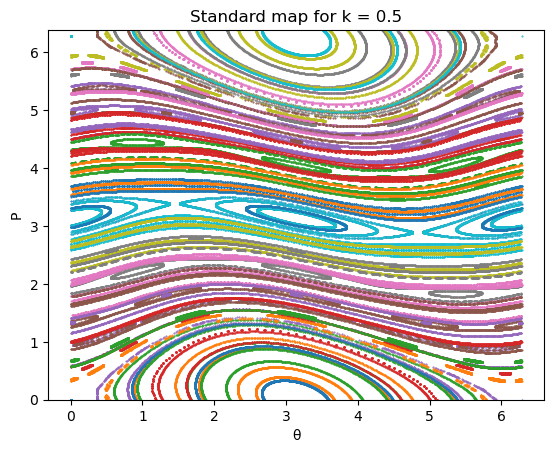

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter and number of iterations
k = 0.5
N = 1000

# Function to calculate the trajectory for a given initial condition
def calculate_trajectory(theta0, p0, k, N):
    theta = np.zeros(N)
    p = np.zeros(N)
    theta[0] = theta0
    p[0] = p0

    for n in range(N - 1):
        theta[n + 1] = (theta[n] + p[n]) % (2 * np.pi)
        p[n + 1] = p[n] + k * np.sin(theta[n + 1])

    return theta, p

# initial points uniformly spaced in phase space
theta0_vals = np.linspace(0, 2 * np.pi, 8)
p0_vals = np.linspace(0, 2 * np.pi, 20)

# Plotting for different initial conditions
for theta0 in theta0_vals:
    for p0 in p0_vals:
        theta, p = calculate_trajectory(theta0, p0, k, N)
        plt.plot(theta, p, ".", markersize=1)

plt.title(f"Standard map for k = {k}")
plt.xlabel("θ")
plt.ylabel("P")
plt.ylim(0, 2 * np.pi + 0.1)
plt.show()
